# Github link:

### 1) Load in the appropriate csv file as a pandas dataframe (batting.csv)

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Batting.csv')

In [3]:
# Fill in na with 0 for HBP, SH, and SF
new_df = df.fillna({'HBP':0,'SH':0,'SF':0})

# Calculation of OBP
new_df['OBP'] = (new_df['H'] + new_df['BB'] + new_df['HBP'])/(new_df['AB'] + new_df['BB'] + new_df['HBP'] + new_df['SF'])

# Calculation of PA
new_df['PA'] = new_df['AB'] + new_df['BB'] + new_df['HBP'] + new_df['SH'] + new_df['SF']

# Calculation of batting average
new_df['BA'] = new_df['H']/new_df['AB']

In [4]:
# Check how many duplicates in playerID, if don't specify columns, it checks the entire row.
print(df.duplicated(subset=['playerID']).sum())

print(df.shape)
print(df.drop_duplicates(subset=['playerID']).shape)
# 102,816 - 18,915 = 83,901

# Create a DataFrame with unique playID and name
name = df[['playerID','nameFirst','nameLast']]
name.drop_duplicates(subset=['playerID'],inplace = True)
name.shape

83901
(102816, 25)
(18915, 25)


C:\Users\Jerry Yang\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


(18915, 3)

### 2) Print out the dimensions and info about the dataframe you just created

In [5]:
print(df.info())
print(df.ndim)
print(df.shape)
print(df.columns)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 25 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102079 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102392 non-null float64
SB           101516 non-null float64
CS           79360 non-null float64
BB           102816 non-null int64
SO           94978 non-null float64
IBB          66251 non-null float64
HBP          100006 non-null float64
SH           96478 non-null float64
SF           66782 non-null float64
GIDP         76706 non-null float

### 3)	How many players have hit 40 or more HRs in one single season? (Number only)

In [6]:
hr_40 = df[['playerID','yearID','HR']].groupby(['playerID','yearID']).sum()

In [7]:
# If the question is looking for unique players
hr_40[hr_40['HR']>=40].index.get_level_values('playerID').nunique()

142

In [8]:
# If it's not necessary to be unique players
len(hr_40[hr_40['HR']>=40].index.get_level_values('playerID'))

330

### 4)	How many players have hit 600 or more HRs for their career? (Dataframe with name and player first and last name only and amount of HRs)

In [10]:
career_hr = df.groupby(['playerID'],)[['HR']].sum()
career_hr600 = career_hr[career_hr['HR']>=600]

In [11]:
career_hr600_new = pd.merge(career_hr600,name,on = 'playerID')[['nameFirst','nameLast','HR']]
career_hr600_new

,nameFirst,nameLast,HR
0,Hank,Aaron,755
1,Barry,Bonds,762
2,Ken,Griffey,630
3,Willie,Mays,660
4,Alex,Rodriguez,696
5,Babe,Ruth,714
6,Sammy,Sosa,609
7,Jim,Thome,612


### 5)	How many unique players have hit 40 2Bs or more, 10 3Bs or more, 200 Hits or more, and 30 HRs or more in one season? (Number Only)

In [12]:
hits = df[['playerID','yearID','2B','3B','H','HR']].groupby(['playerID','yearID']).sum()

In [13]:
hits[(hits['2B']>=40) & (hits['3B']>=10) & (hits['H']>=200) & (hits['HR'] >=30)].index.get_level_values('playerID').nunique()

11

### 6)	How many players seasons have had 100 or more SBs? (Dataframe, first name, last name, yearID, number of SBs, ordered from descending SBs)

In [14]:
SBs = df[['playerID','yearID','SB']].groupby(['playerID','yearID']).sum()

In [15]:
SBs.reset_index(level=['playerID','yearID'],inplace = True)

In [16]:
SBs_100 = pd.merge(SBs,name,on='playerID')[['nameFirst','nameLast','yearID','SB']]
new_SBs_100 = SBs_100[SBs_100['SB']>=100].sort_values('SB',ascending = False)
new_SBs_100

,nameFirst,nameLast,yearID,SB
62362,Hugh,Nicol,1887,138.0
37059,Rickey,Henderson,1982,130.0
48268,Arlie,Latham,1887,129.0
9713,Lou,Brock,1974,118.0
16703,Charlie,Comiskey,1887,117.0
34649,Billy,Hamilton,1889,111.0
89859,John,Ward,1887,111.0
34651,Billy,Hamilton,1891,111.0
16351,Vince,Coleman,1985,110.0
16353,Vince,Coleman,1987,109.0


### 7)	How many players in the 1960s (yearID) have hit 200 or more HRs? (Dataframe, first name, last name, number of HRs, ordered descending by HR amt)

In [17]:
hr60s = df[['HR','playerID']][(df['yearID']>=1960) & (df['yearID']<1970)]

In [18]:
hr60s_new = hr60s.groupby('playerID').sum()

In [19]:
hr60s_new1 = hr60s_new[hr60s_new['HR']>=200]
hr60s_new2 = pd.merge(hr60s_new1,name,on = 'playerID')[['nameFirst','nameLast','HR']].sort_values(by=['HR'],ascending = False)
hr60s_new2

,nameFirst,nameLast,HR
8,Harmon,Killebrew,393
0,Hank,Aaron,375
12,Willie,Mays,350
15,Frank,Robinson,316
13,Willie,McCovey,300
6,Frank,Howard,288
3,Norm,Cash,278
2,Ernie,Banks,269
9,Mickey,Mantle,256
4,Orlando,Cepeda,254


### 8)	Who has hit the most HRs in history? (Dataframe, first name, last name, HRs)

In [21]:
s = df[['HR','playerID']].groupby('playerID').sum().nlargest(1,'HR')
s

,HR
playerID,
bondsba01,762


In [22]:
merged = pd.merge(s,name, on = 'playerID')[['nameFirst','nameLast','HR']]
merged

,nameFirst,nameLast,HR
0,Barry,Bonds,762


### 9)	Who had the most hits (H) in the 1970s? (Dataframe)

In [23]:
hit70s = df[['playerID','H']][(df['yearID']>=1970) & (df['yearID']<1980)].groupby('playerID').sum().nlargest(1,'H')
hit70s

,H
playerID,
rosepe01,2045


In [24]:
hit70s_new = pd.merge(hit70s,name, on = 'playerID')[['nameFirst','nameLast','H']]
hit70s_new

,nameFirst,nameLast,H
0,Pete,Rose,2045


### 10)	Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  (Dataframe, first name, last name, OBP, ordered descending by OBP)

In [25]:
obp = new_df[['nameFirst','nameLast','OBP']][(new_df['yearID']==1977) & (new_df['PA']>=500)].nlargest(5,'OBP')
obp

,nameFirst,nameLast,OBP
54603,Rod,Carew,0.448773
55273,Ken,Singleton,0.437788
55280,Reggie,Smith,0.426910
54820,Mike,Hargrove,0.420312
55095,Joe,Morgan,0.417054


### 11)	Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe, first name, last name, average, descending by average)

In [26]:
ba = new_df[['nameFirst','nameLast','BA']][(new_df['yearID']==2013) & (new_df['PA']>=300)].nlargest(8,'BA')

In [27]:
ba

,nameFirst,nameLast,BA
97188,Miguel,Cabrera,0.347748
98062,Hanley,Ramirez,0.345395
97300,Michael,Cuddyer,0.331288
97825,Joe,Mauer,0.323596
98293,Mike,Trout,0.322581
97651,Chris,Johnson,0.321012
97437,Freddie,Freeman,0.319419
98043,Yasiel,Puig,0.319372


### 12)	Leaders in hits from 1940 up to and including 1949. (Dataframe, first name, last name, number of hits)

In [28]:
hit_40 = df[['playerID','H']][(df['yearID']>=1940) & (df['yearID']<=1949)].groupby('playerID').sum().nlargest(5,'H')

In [29]:
hit_40s = pd.merge(hit_40, name, on = 'playerID')[['nameFirst','nameLast','H']]

In [30]:
hit_40s

,nameFirst,nameLast,H
0,Lou,Boudreau,1578
1,Bob,Elliott,1563
2,Dixie,Walker,1512
3,Stan,Musial,1432
4,Bobby,Doerr,1407


### 13)	Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number of hits)

In [54]:
MLB = df[['playerID','yearID','H']].groupby(['playerID','yearID']).sum()

In [58]:
MLB_H = MLB.reset_index().sort_values(['yearID','H'], ascending = False).groupby('yearID').head(1)
MLB_H1 = MLB_H.groupby('playerID').count().sort_values('yearID', ascending = False).head(1)
MLB_H1

,yearID,H
playerID,,
cobbty01,7,7


In [64]:
MLB_H2 = MLB_H[MLB_H['playerID']=='cobbty01']
MLB_H3 = pd.merge(MLB_H2,name,on = 'playerID')[['nameFirst','nameLast','yearID','H']]
MLB_H3

,nameFirst,nameLast,yearID,H
0,Ty,Cobb,1919,191
1,Ty,Cobb,1917,225
2,Ty,Cobb,1915,208
3,Ty,Cobb,1912,226
4,Ty,Cobb,1911,248
5,Ty,Cobb,1909,216
6,Ty,Cobb,1907,212


### 14)	 Which players have played the most games for their careers?  Top 5 first name, last name, descending by games played presented as a dataframe

In [94]:
most_game = df[['playerID','G']].groupby('playerID').sum().nlargest(5,'G')
most_game1 = pd.merge(most_game,name,on = 'playerID')[['nameFirst','nameLast','G']]
most_game1

,nameFirst,nameLast,G
0,Pete,Rose,3562
1,Carl,Yastrzemski,3308
2,Hank,Aaron,3298
3,Rickey,Henderson,3081
4,Ty,Cobb,3035


### 15)	How many players have had more 3000 or more hits for their careers while also hitting 500 or more HRs?  Just a number is okay here

In [108]:
h_hr = df[['playerID','H','HR']].groupby('playerID').sum()
h_hr[(h_hr['H']>=3000) & (h_hr['HR']>=500)].shape[0]

5

### 16) How many HRs were hit during the entire 1988 season?  Just a number is okay here

In [111]:
df[['HR']][df['yearID']==1988].sum()

HR    3180
dtype: int64

### 17) Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 or more ABs.  Dataframe, first name, last name, average, descending by average

In [116]:
new_df[['nameFirst','nameLast','BA']][(new_df['nameFirst']=='Wade') & (new_df['nameLast']=='Boggs') & (new_df['AB']>=500)].nlargest(3,'BA')

,nameFirst,nameLast,BA
62316,Wade,Boggs,0.367534
65391,Wade,Boggs,0.366438
64335,Wade,Boggs,0.362976


### 18)	 Please filter out the top 10 OBPs for the 1995 season with 400 or more PAs, sorted by OBP descending.  Dataframe with first name, last name, OBP

In [119]:
top10_obp = new_df[['nameFirst','nameLast','OBP']][(new_df['yearID']==1995) & (new_df['PA']>=400)].nlargest(10,'OBP')
top10_obp

,nameFirst,nameLast,OBP
73578,Edgar,Martinez,0.478873
73996,Frank,Thomas,0.454405
73611,Mark,McGwire,0.440758
73999,Jim,Thome,0.438061
73002,Barry,Bonds,0.431496
73875,Tim,Salmon,0.429467
73145,Chili,Davis,0.429119
73560,Dave,Magadan,0.427553
73495,Chuck,Knoblauch,0.424483
73671,Tim,Naehring,0.414729


### 19)	Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  I would like a dataframe with first name, last name, number of 3Bs

In [130]:
most_3b = df[['playerID','3B']][(df['yearID']==1922) | (df['yearID']==1925) | (df['yearID']==1926) | (df['yearID']==1928)].groupby('playerID').sum().nlargest(1,'3B')

In [133]:
new_most_3b = pd.merge(most_3b,name,on = 'playerID')[['nameFirst','nameLast','3B']]
new_most_3b

,nameFirst,nameLast,3B
0,Curt,Walker,59


### 20)	How many unique players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  A number is okay here

In [11]:
hr_sb = df[['playerID','yearID','HR','SB']].groupby(['playerID','yearID']).sum()

In [55]:
# Extract one column "playerID" from multi-index then count the uniques
hr_sb[(hr_sb['HR']>=30) & (hr_sb['SB']>=30)].index.get_level_values('playerID').nunique()

38

### 21)	 Who had the highest OBP is 1986 with 400 or more ABs? (Dataframe first name, last name, OBP)

In [64]:
data_1986 = new_df[['playerID','H','BB','HBP','AB','SF']][new_df['yearID']==1986].groupby('playerID').sum()

In [66]:
data_1986['OBP'] = (data_1986['H'] + data_1986['BB'] + data_1986['HBP']) / (data_1986['AB'] + data_1986['BB'] + data_1986['HBP'] + data_1986['SF'])

In [71]:
obp_1986 = data_1986[['OBP']][data_1986['AB']>=400].nlargest(1,'OBP')
new_obp_1986 = pd.merge(obp_1986,name,on = 'playerID')[['nameFirst','nameLast','OBP']]
new_obp_1986

,nameFirst,nameLast,OBP
0,Wade,Boggs,0.45283


### 22)	Same question but for 1997 and only in the NL (check league ID)? (Dataframe, first name, last name OBP)

In [74]:
data_1997 = new_df[['playerID','H','BB','HBP','AB','SF']][(new_df['yearID']==1997) & (new_df['lgID']=='NL')].groupby('playerID').sum()
data_1997['OBP'] = (data_1997['H'] + data_1997['BB'] + data_1997['HBP']) / (data_1997['AB'] + data_1997['BB'] + data_1997['HBP'] + data_1997['SF'])

In [75]:
obp_1997 = data_1997[['OBP']][data_1997['AB']>=400].nlargest(1,'OBP')
new_obp_1997 = pd.merge(obp_1997,name,on = 'playerID')[['nameFirst','nameLast','OBP']]
new_obp_1997

,nameFirst,nameLast,OBP
0,Larry,Walker,0.451807


### 23)	Who had more than the league average HRs (for players with 500 or more ABs) in 2012 (filter out all players with less 500 ABs)? (Dataframe first name, last name, HR descending)

In [97]:
data_2012 = df[['playerID','HR','AB']][df['yearID']==2012].groupby('playerID').sum()

In [101]:
new_data_2012 = data_2012[data_2012['AB'] >= 500]
hr_2012 = new_data_2012[new_data_2012['HR'] > new_data_2012['HR'].mean()]
new_hr_2012 = pd.merge(hr_2012,name,on = 'playerID')[['nameFirst','nameLast','HR']].sort_values(by=['HR'],ascending = False)
new_hr_2012

,nameFirst,nameLast,HR
6,Miguel,Cabrera,44
18,Josh,Hamilton,43
17,Curtis,Granderson,43
13,Edwin,Encarnacion,42
3,Ryan,Braun,41
12,Adam,Dunn,41
1,Adrian,Beltre,36
49,Josh,Willingham,35
4,Jay,Bruce,34
29,Adam,LaRoche,33


### 24)	 Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe, first name, last name, HRs, season)

In [226]:
df_1 = df[df['birthYear']!=0]

In [231]:
young = df_1[['playerID','yearID','HR','birthYear']].groupby(['playerID','yearID','birthYear']).sum().reset_index()

In [232]:
young['age'] = young['yearID'] - young['birthYear']

In [239]:
young1 = young[young['HR']>=50].sort_values('age',ascending = True).head(1)
young1

,playerID,yearID,birthYear,HR,age
26241,fieldpr01,2007,1984,50,23


In [240]:
young2 = pd.merge(young1,name,on = 'playerID')[['nameFirst','nameLast','HR','yearID']]
young2

,nameFirst,nameLast,HR,yearID
0,Prince,Fielder,50,2007


### 25)	Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe, first name, last name, season they eclipsed more than 300 HRs)

In [150]:
df25 = df[['playerID','yearID','HR']].groupby(['playerID','yearID']).sum().reset_index()

In [164]:
bir = df[['playerID','birthYear','nameFirst','nameLast']]

In [165]:
bir.drop_duplicates(subset=['playerID'],inplace = True)

C:\Users\Jerry Yang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [166]:
df25_1 = pd.merge(df25,bir,on = 'playerID')

In [167]:
df25_1['age'] = df25_1['yearID'] - df25_1['birthYear']

In [168]:
bo = df25_1.groupby('playerID').cumsum().HR >= 300
df25_1['bo'] = bo
df25_2 = df25_1[df25_1['bo']==True].drop_duplicates(['playerID','bo'])

In [176]:
df25_3 = df25_2.sort_values('age', ascending = True)[['nameFirst','nameLast','yearID']].head()
df25_3

,nameFirst,nameLast,yearID
27852,Jimmie,Foxx,1935
64767,Mel,Ott,1937
69369,Albert,Pujols,2008
43074,Andruw,Jones,2005
73216,Alex,Rodriguez,2003


### BONUS1:  Graph total HRs per season using bar graph

In [177]:
import matplotlib.pyplot as plt

In [178]:
%matplotlib inline

In [186]:
b1 = df[['yearID','HR']].groupby('yearID').sum().reset_index()

<BarContainer object of 146 artists>

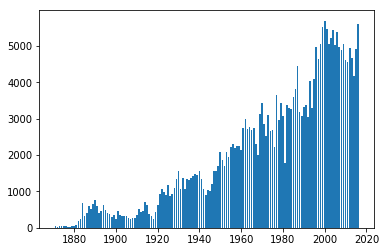

In [184]:
plt.bar(b1['yearID'],b1['HR'])

### BONUS2: Using a line graph please graph the average HRs per AB (think about this) per season

In [205]:
B2 = df[['playerID','yearID','HR','AB']].groupby(['playerID','yearID']).sum().reset_index()

In [206]:
B2['avg_hr_ab'] = B2['HR'] / B2['AB']

In [207]:
B2_1 = B2[['yearID','avg_hr_ab']].groupby('yearID').mean().reset_index()

Text(0.5,1,'Average HRs per AB per season')

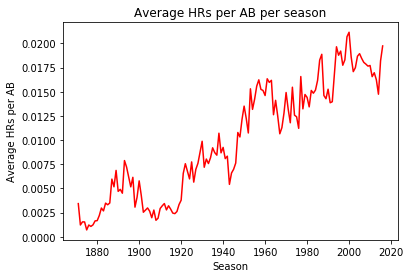

In [208]:
plt.plot(B2_1['yearID'], B2_1['avg_hr_ab'], 'r')
plt.xlabel('Season')
plt.ylabel('Average HRs per AB')
plt.title('Average HRs per AB per season')